# Evaluate impact of kernel activation and initialization

### 1. Generate random training data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
pylab.rcParams['figure.figsize'] = (5, 3)


X_train = np.random.normal(size=(10000, 100))
X_train = np.random.uniform(size=(10000, 100))
X_train.shape

X_train -= X_train.mean()
X_train /= X_train.std()

plt.hist(X_train.reshape(-1), 50)
plt.show()

### 2. Build a simple fully connected model 

In [ ]:
import keras
import keras.backend as K
from keras.layers import Input, Dense
from keras.models import Model

def simple_FC_model(activation, initializer):
    # Define input tensor
    input_tensor = Input(shape=(100,))
    
    # Propagate it through 20 fully connected layers
    x = Dense(1024,
              activation=activation,
              kernel_initializer=initializer)(input_tensor)
    for _ in range(70):
        x = Dense(1024,
                  activation=activation,
                  kernel_initializer=initializer)(x)
    
    # Return the corresponding Keras model
    model = Model(input_tensor, x)
    return model


def show_model(activations, initializers):
    """Shows prediction distribution for each pair of activation/initializer
    
    Params:
        activations: a list of activations
        initializers: a list of initializers (same lenght as activations)
    """
    n_fig = len(activations)
    
    fig, axs = plt.subplots(1, n_fig)
    for i in range(n_fig):
        act, init = zip(activations, initializers)[i]
        
        # Build the model and evaluate it
        model = simple_FC_model(act, init)
        pred = model.predict(X_train)
        K.clear_session()
        
        # Show the results
        act = act if isinstance(act, str) else act.func_name
        init = init if isinstance(init, str) else init.func_name

        print "{} {} std: {:.4f}, mean: {:.3f}".format(act,
                                                 init,
                                                 pred.std(),
                                                 pred.mean())
        axs[i].hist(pred.reshape(-1), 50)
        axs[i].set_title(act + " - " + init)
    plt.show()

### 3. Weights initialization

http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf  
http://jmlr.org/proceedings/papers/v9/glorot10a/glorot10a.pdf

- Normal: draws weights from a normal distribution with $\mu=0$ and $\sigma = 1$

- Glorot normal initializer: draws weights from truncated normal with $\mu=0$ and
$\sigma = \sqrt\frac{2}{\text{fan_in} + \text{fan_out}}$

- Lecun normal initializer: draws weights from truncated normal with $\mu=0$ and
$\sigma = \sqrt\frac{1}{\text{fan_in}}$

--- 
- Uniform: draws weights from a uniform distribution with $f : \mathbb{R} \to [-x_{max}; x_{max}]$ and $x_{max} = 0.05$

- Glorot uniform initializer: draws weights Uniform distribution with
$x_{max} = \sqrt\frac{6}{\text{fan_in} + \text{fan_out}}$

- Lecun Uniform initializer: draws weights Uniform distribution with
$x_{max} = \sqrt\frac{3}{\text{fan_in}}$



###  4. Show activation distributions
##### a) Relu

In [ ]:
pylab.rcParams['figure.figsize'] = (15, 4)
activations = ['relu']*4
initializers = ['uniform', 'glorot_uniform', 'normal', 'glorot_normal']
show_model(activations, initializers)

##### b) Sigmoid

sigmoid uniform std: 0.1130, mean: 0.496
sigmoid glorot_uniform std: 0.1190, mean: 0.499
sigmoid lecun_uniform std: 0.1198, mean: 0.499
sigmoid normal std: 0.1797, mean: 0.503
sigmoid glorot_normal std: 0.1081, mean: 0.498
sigmoid lecun_normal std: 0.1048, mean: 0.499


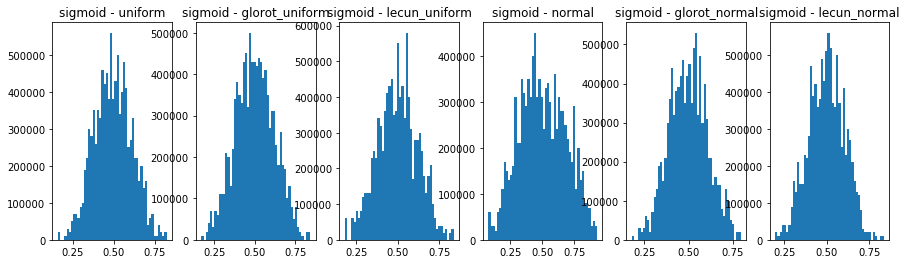

In [47]:
pylab.rcParams['figure.figsize'] = (15, 4)
activations = ['sigmoid']*6
initializers = ['uniform', 'glorot_uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'lecun_normal']
show_model(activations, initializers)

##### c) tanh

In [ ]:
pylab.rcParams['figure.figsize'] = (15, 4)
activations = ['tanh']*4
initializers = ['uniform', 'glorot_uniform', 'normal', 'glorot_normal']
show_model(activations, initializers)

##### c) Lecun tanh

In [ ]:
pylab.rcParams['figure.figsize'] = (15, 4)

def lecun_tanh(x):
    return 1.7159 * K.tanh(2 * x / 3)

activations = [lecun_tanh]*6
initializers = ['uniform', 'glorot_uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'lecun_normal']
show_model(activations, initializers)